<a href="https://colab.research.google.com/github/Rohit233/gender_classification/blob/main/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from PIL import Image

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [12]:
px =50
from zipfile import ZipFile

with ZipFile('dataset.zip', 'r') as zipObj:
   zipObj.extractall()
train_path ="Training"
test_path ="Validation"

train_male = "Training/male"
train_female = "Training/female"

test_male = "Validation/male"
test_female = "Validation/female"


Text(0.5, 1.0, 'Gender Category of Train Set')

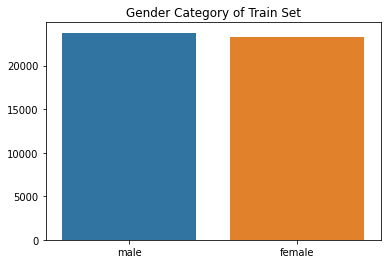

In [18]:
category_names = os.listdir(train_path)
num_category_names =len(category_names)
train_images = []
for category in category_names:
    folder = train_path +"/"+ category
    train_images.append(len(os.listdir(folder)))

g = sns.barplot(x=category_names,y=train_images)
g.set_title("Gender Category of Train Set")



Text(0.5, 1.0, 'Gender Category of test Set')

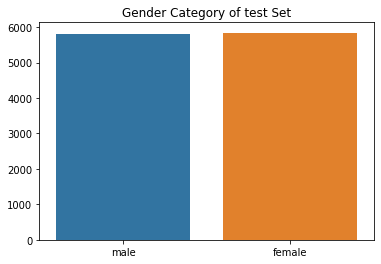

In [19]:
test_images = []
for category in category_names:
    folder = test_path +"/"+ category
    test_images.append(len(os.listdir(folder)))

g = sns.barplot(x=category_names,y=test_images)
g.set_title("Gender Category of test Set")

In [20]:
#TrainDataset

male_train = []
label = []
for i in os.listdir(train_male):
    if os.path.isfile(train_male + "/" + i):
        males = Image.open(train_male + "/" + i).convert("L")  # Converting grey scale
        males = males.resize((px, px), Image.ANTIALIAS)

        males = np.asarray(males) / 255.0  # Normalizing Images
        male_train.append(males)
        label.append(False)
female_train = []
for i in os.listdir(train_female):
    if os.path.isfile(train_female + "/" + i):
        females = Image.open(train_female + "/" + i)
        females = females.resize((px, px), Image.ANTIALIAS).convert("L")  # Converting grey scale

        females = np.asarray(females) / 255.0  # Normalizing Images

        female_train.append(females)
        label.append(True)

x_train = np.concatenate((male_train,female_train),axis=0) # Training Dataset
y_train = np.asarray(label)# Label array
y_train = y_train.reshape(x_train.shape[0],1)

print("Woman Faces",np.shape(female_train),"Man Faces",np.shape(male_train))
print("Train Dataset",x_train.shape,"Train Values",y_train.shape)


Woman Faces (23243, 50, 50) Man Faces (23766, 50, 50)
Train Dataset (47009, 50, 50) Train Values (47009, 1)


In [21]:
#Test Dataset

male_test = []
label2 = []
for i in os.listdir(test_male):
    if os.path.isfile(test_male + "/" + i):
        male_face = Image.open(test_male + "/" + i).convert("L")  # Convert grey scale
        male_face = male_face.resize((px, px), Image.ANTIALIAS)

        male_face = np.asarray(male_face) / 255.0  # Normalizing Images
        male_test.append(male_face)
        label2.append(False) 

female_test = []
for i in os.listdir(test_female):
    if os.path.isfile(test_female + "/" + i):
        female_face = Image.open(test_female + "/" + i).convert("L")  # Convert grey scale
        female_face = female_face.resize((px, px), Image.ANTIALIAS)

        female_face = np.asarray(female_face) / 255.0  # Normalizing Image
        female_test.append(female_face)
        label2.append(True)

x_test = np.concatenate((male_test,female_test),axis=0)#test dataset
y_test = np.asarray(label2)
y_test = y_test.reshape(x_test.shape[0],1)

print("Man Faces",np.shape(male_test),"Female Faces",np.shape(female_test))
print("Test Dataset",x_test.shape,"Test Dataset Values",y_test.shape)

Man Faces (5808, 50, 50) Female Faces (5841, 50, 50)
Test Dataset (11649, 50, 50) Test Dataset Values (11649, 1)


In [22]:
x = np.concatenate((x_train,x_test),axis=0)
y = np.concatenate((y_train,y_test),axis=0)

x = x.reshape(x.shape[0],x.shape[1]*x.shape[2])# Convert 3D to 2D
print("x shape:{}\ny shape{}".format(x.shape,y.shape))


X_train,X_test,Y_train,Y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=1)

x_train = X_train.T
x_test = X_test.T
y_train = Y_train.T
y_test = Y_test.T
print("x_train:{}\nx_test:{}\ny_train:{}\ny_test:{}".format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

print("Accuracy Score Train: %{:.2f} ".format(accuracy_score(log_reg.predict(X_train),Y_train)*100))
print("Accuracy Score Test: %{:.2f} ".format(accuracy_score(log_reg.predict(X_test),Y_test)*100))

x shape:(58658, 2500)
y shape(58658, 1)
x_train:(2500, 46926)
x_test:(2500, 11732)
y_train:(1, 46926)
y_test:(1, 11732)
Accuracy Score Train: %86.58 
Accuracy Score Test: %85.40 
